In [1]:
%autosave 0

from tope import Tope
from tope.net import *
from tope.orth import *
from tope.graph import Graph
from tests import normalize_polygon
from tope.plot import plot_artists_in_view

import numpy as np
import stl

import matplotlib as mpl
import matplotlib.pyplot as plt

import json, os

# import prepackaged data
with open("../data/polys2.json") as fd: 
    polys = json.load(fd)
    
logger.remove()

Autosave disabled


In [2]:
def perspective_project(v: np.ndarray, offset: float):
    """
    Convention: project into hyperplane (v[0]=0) translated by offset.
    - v: float[M,N]
    - offset: float
    """
    return v[:,...,1:] / (v[:,...,:1] - offset)

FALLBACK_RNG = np.random.default_rng()

def random_orth(N: int, rng = FALLBACK_RNG) -> np.ndarray:
    """
    Uniform random element of O(N) with positive diagonal entries sampled using Haar measure.
    """
    Q,R = np.linalg.qr(rng.normal(size=(N,N))) # project GL(N) -> O(N)
    return Q @ np.diag(np.sign(np.diag(R)))    # fix signs

> list(mpl.colormaps)


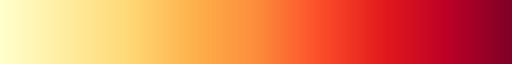

In [3]:
mpl.colormaps.get("YlOrRd")

In [10]:
def create_lc(edges, color_map = "Set2"):
    segments = []
    colors = []
    cmap = mpl.colormaps.get(color_map)
    for i, edge in enumerate(edges):
        segments.append(edge)
        colors.append(cmap(0.25+ 0.5*i/len(edges)))
    return mpl.collections.LineCollection(segments, color=colors)

# Parameters

In [11]:
POLYTOPE     = "24-cell"
FIG_FILENAME = "nets-unfolded.png"
STL_FILENAME = "thing24.stl"
COLOR_MAP    = 

## Randomization

In [12]:
Q = random_orth(3)

# Actually do the stuff

In [13]:
P = Tope.from_vertices(polys[POLYTOPE])
T = P.facet_graph().width_first_spanning_tree()
N = Net(P, T).unfold().in_own_span()

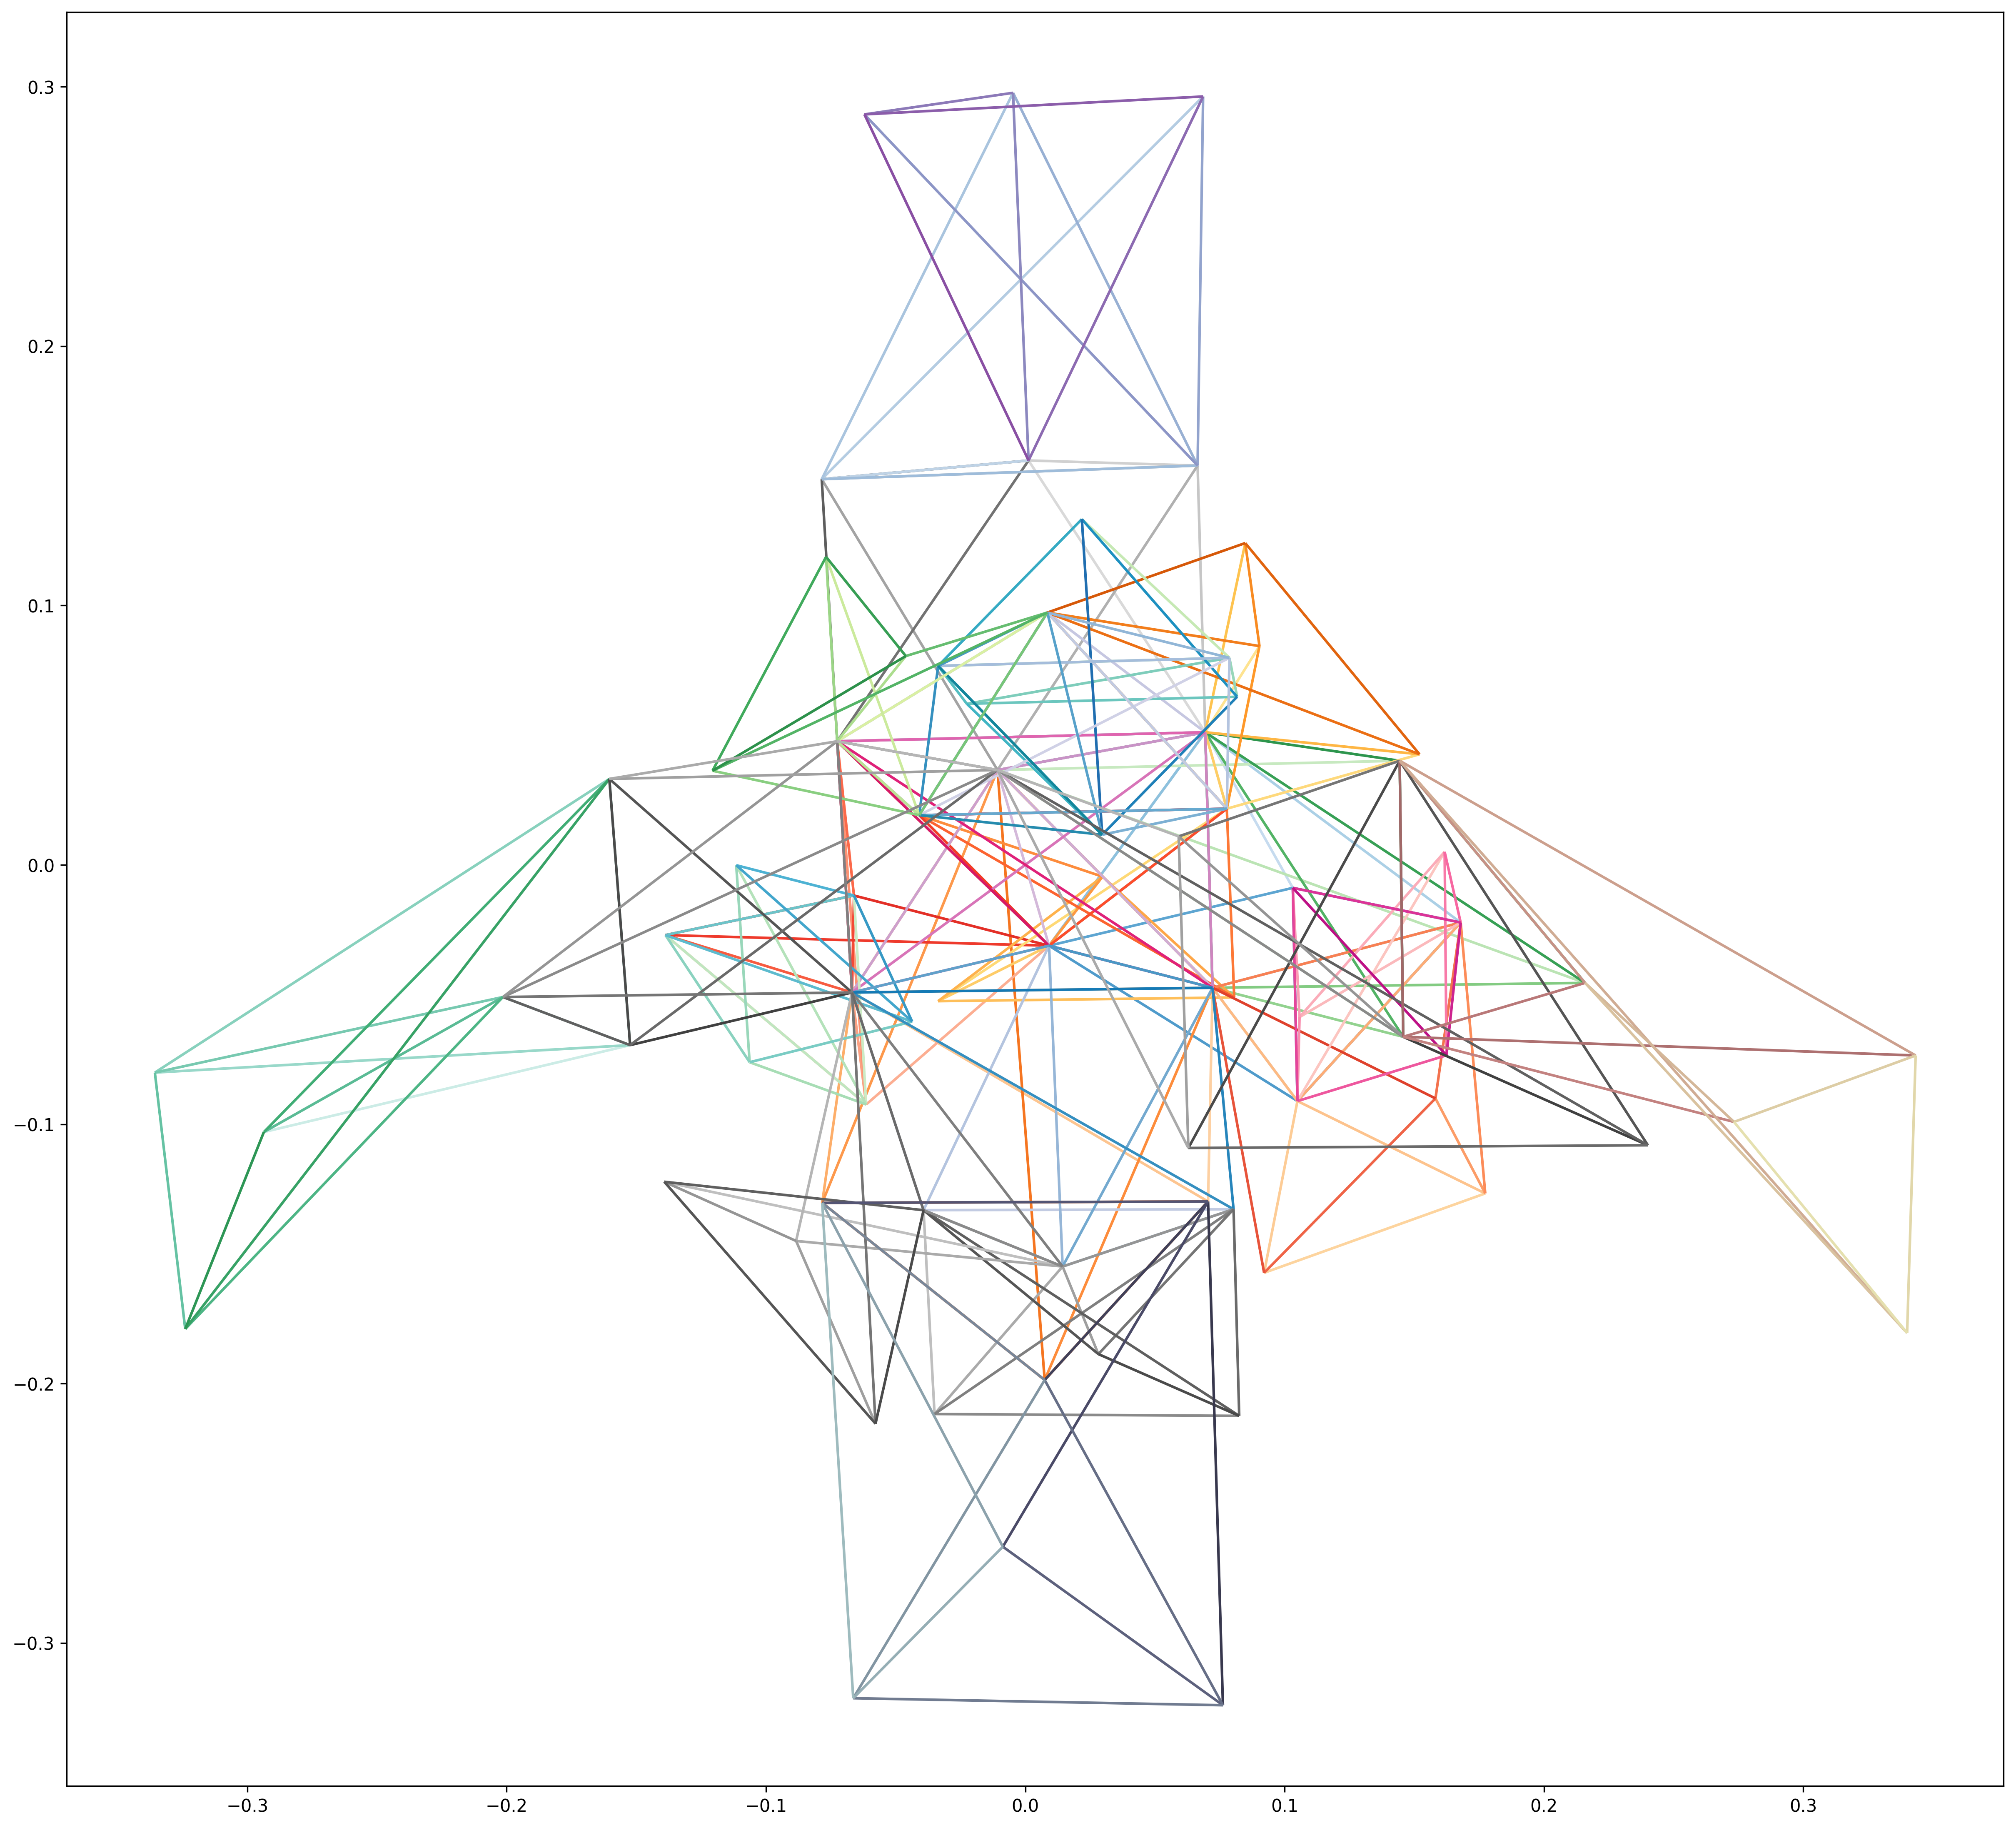

In [14]:
fig, ax = plt.subplots(dpi=300)

cell_edges = [np.stack([F.vertices[sorted(e)] for e in F.iter_faces(1)]) for F in N.facets.values()]

for n, cell in enumerate(cell_edges):
    edges = perspective_project(cell @ Q, 10)
    lc = create_lc(edges, color_map = cmaps[n%len(cmaps)])
    ax.add_collection(lc)
#    for ax in axs[:n+1]:
#        lc = create_lc(edges, color_map = cmaps[n%len(cmaps)])
#        ax.add_collection(lc)
        
#bbox = axs[0].dataLim
        
#for ax in axs:
#    ax.dataLim = bbox
ax.set_aspect("equal")
ax.autoscale()

fig.set_size_inches(20,20)
fig.savefig("nets-builder1.png")

# Make STL

In [ ]:
faces = []
for facet in N.facets.values():
    for i in facet.faces[2]:
        D = facet.vertices[sorted(i)]
        faces.append(D)

In [ ]:
thing = stl.mesh.Mesh(np.zeros(len(faces), dtype=stl.mesh.Mesh.dtype))
thing.vectors[:,:,:] = faces
thing.save(FILENAME)